## Sentiment Analysis in Python with Vader

Sentiment analysis is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Essentially just trying to judge the amount of emotion from the written words & determine what type of emotion. This post we'll go into how to do this with Python and specifically the package Vader <https://github.com/cjhutto/vaderSentiment>. This post comes from a recent research project I helped out with the University of San Diego for investigating the sentiment of Twitter users in Italy during the pandemic against when the policy changes were enacted (eg, Lockdowns, etc). Sentiment analysis was the step after translating the data, which was detailed on a previous post: <https://jackmckew.dev/translating-text-in-python.html>.

> Find the full source code for the research project at: <https://github.com/HDMA-SDSU/Translate-Tweets>

As always, first we set up the virtual environment, install any necessary packages and import them. In this post we'll make use of:

- nltk
- pandas
- vader
- wordcloud

We also prepare a few datasets to use later on, stopwords & wordnet. Stop words are words which in English add no meaning to the rest of the setence, for example, the words like the, he, have etc. All these stopwords can be ignored without ruining the meaning of the sentence; although when using pre-computed sentiment analysis libraries removing these words may be of detriment to the determined scores.

![Wordcloud]({static img/overall-wordcloud.png})

Wordnet is used later on for lemmatization (aka stemming), which is the process of bringing words down to their 'root' word. For example, the words car, cars, car's, cars' all share the common 'root' word, `car`. Note that this can also be of detriment when using pre-computer sentiment analysis libraries.

In [1]:
import pandas as pd
import nltk
import typing
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jackm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Next up we need a dataset that we can run the sentimment analysis on, for this we use a dataset offered by a stanford course (<https://nlp.stanford.edu/sentiment/code.html>) which contains ~10,000 rotten tomato reviews (a movie review website). Let's try and find the top positive & negative reviews in this dataset with vader.

In [2]:
# Read in data here
# https://nlp.stanford.edu/sentiment/code.html
text_data = pd.read_table('original_rt_snippets.txt',header=None)
display(text_data.sample(5))

,0
1493,This remake gets all there is to get out of a ...
1209,"As a first-time director, Paxton has tapped so..."
6536,"The story has its redundancies, and the young ..."
1435,"If you're in the mood for a Bollywood film, he..."
3691,"Death to Smoochy is often very funny, but what..."


Now that we've downloaded the stopword dataset previously, let's take a look at whats inside it.

In [3]:
# Import english stop words

from nltk.corpus import stopwords
stopcorpus: typing.List = stopwords.words('english')
print(stopcorpus)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Finally it's time to analyse the sentiment with Vader, we need to import the `SentimentIntensityAnalzer` object to gain access to the polarity score methods inside.

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_analyzer = SentimentIntensityAnalyzer()

To make it easier to interface, let's define some functions which will make it easier to grab all the sentiment values for a specific column in a dataframe. `get_sentiment` wraps around the analysers polarity scoring method and returns the sentiment score for the specified label. The Vader sentiment analyser method returns a dictionary with the scores for positive, negative, neutral and compound. Next we define the function `get_sentiment_scores`, which will call `get_sentiment` function on every value in a certain column and add these values back to the dataframe as a column.

In [5]:
def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    df[f'{data_column} Neutral Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neu'))
    df[f'{data_column} Compound Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'compound'))
    return df

Now let's use these functions and calculate the sentiment for all the reviews.

In [6]:
text_sentiment = get_sentiment_scores(text_data,0)

display(text_sentiment.sample(5))

,0,0 Positive Sentiment Score,0 Negative Sentiment Score,0 Neutral Sentiment Score,0 Compound Sentiment Score
6157,The ending doesn't work ... but most of the mo...,0.135,0.083,0.782,0.3740
2295,"A special kind of movie, this melancholic film...",0.158,0.081,0.761,0.3237
5009,"As Allen's execution date closes in, the docum...",0.110,0.052,0.837,0.3674
8917,The biggest problem I have (other than the ver...,0.121,0.153,0.726,-0.2944
2743,"Performances all around are tops, with the two...",0.231,0.000,0.769,0.5106


Now we can find all the top scoring reviews for all the different types of sentiment and check if they make sense.

From the Vader documentation ar0und compound scoring:
The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [7]:
def print_top_n_reviews(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Review: {row[0]}")

In [8]:
print_top_n_reviews(text_sentiment,'0 Positive Sentiment Score',5)

Score: 1.0, Review: Harmless fun.
Score: 1.0, Review: Fantastic!
Score: 0.899, Review: Exhilarating, funny and fun.
Score: 0.895, Review: A pleasant romantic comedy.
Score: 0.888, Review: (An) hilarious romantic comedy.


In [9]:
print_top_n_reviews(text_sentiment,'0 Negative Sentiment Score',5)

Score: 1.0, Review: Horrible.
Score: 1.0, Review: Terrible.
Score: 0.873, Review: Idiotic and ugly.
Score: 0.853, Review: (A) crushing disappointment.
Score: 0.825, Review: A horrible, 99-minute stink bomb.


In [10]:
print_top_n_reviews(text_sentiment,'0 Neutral Sentiment Score',5)

Score: 1.0, Review: Ultimately, it ponders the reasons we need stories so much.
Score: 1.0, Review: Illuminating if overly talky documentary.
Score: 1.0, Review: A real movie, about real people, that gives us a rare glimpse into a culture most of us don't know.
Score: 1.0, Review: In its ragged, cheap and unassuming way, the movie works.
Score: 1.0, Review: a screenplay more ingeniously constructed than ``Memento''


In [11]:
print_top_n_reviews(text_sentiment,'0 Compound Sentiment Score',5)

Score: 0.9706, Review: Parker holds true to Wilde's own vision of a pure comedy with absolutely no meaning, and no desire to be anything but a polished, sophisticated entertainment that is in love with its own cleverness.
Score: 0.9694, Review: We've seen it all before in one form or another, but director Hoffman, with great help from Kevin Kline, makes us care about this latest reincarnation of the world's greatest teacher.
Score: 0.9688, Review: May be far from the best of the series, but it's assured, wonderfully respectful of its past and thrilling enough to make it abundantly clear that this movie phenomenon has once again reinvented itself for a new generation.
Score: 0.9674, Review: We can see the wheels turning, and we might resent it sometimes, but this is still a nice little picture, made by bright and friendly souls with a lot of good cheer.
Score: 0.9674, Review: It's inoffensive, cheerful, built to inspire the young people, set to an unending soundtrack of beach party pop 

Fantastic! This worked beautifully, now let's try and visualise the types of words being used in the top scorers with a word cloud. For generating the word cloud visualisation, there's an amazing package [word_cloud](https://github.com/amueller/word_cloud). But prior to making this visualisation, we'll make use of the stop words and wordnet we downloaded previously to 'clean' the text data.

In [12]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    import re
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text


text_data['cleaned_text'] = text_data[0].astype(str).apply(remove_links)

text_data['cleaned_text'] = text_data['cleaned_text'].astype(str).apply(style_text)

text_data['cleaned_text'] = text_data['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

text_data['cleaned_text'] = text_data['cleaned_text'].apply(collapse_list_to_string)

text_data['cleaned_text'] = text_data['cleaned_text'].apply(remove_apostrophes)

display(text_data['cleaned_text'].head(5))

0    rock destined 21st centurys new conan hes goin...
1    gorgeously elaborate continuation the lord rin...
2                           effective too-tepid biopic
3    sometimes like go movies fun, wasabi good plac...
4    emerges something rare, issue movie thats hone...
Name: cleaned_text, dtype: object

Now to bring all the words back to their 'root' words with lemmatization.

In [13]:
# Lemmatize cleaned text (stem words)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

text_data['clean_lemmatized'] = text_data['cleaned_text'].astype(str).apply(lemmatize_text)

text_data['clean_lemmatized'] = text_data['clean_lemmatized'].apply(collapse_list_to_string)

display(text_data['clean_lemmatized'].head(5))

0    rock destined 21st century new conan he going ...
1    gorgeously elaborate continuation the lord rin...
2                           effective too-tepid biopic
3    sometimes like go movie fun, wasabi good place...
4    emerges something rare, issue movie thats hone...
Name: clean_lemmatized, dtype: object

Let's build a word cloud of all the reviews first before we filter out for just top scorers in different categories and see what the most frequently mentioned words are. We define a function for plotting the word cloud to make it easy as possible to change out the source data.

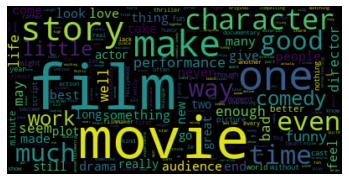

In [14]:
def plot_wordcloud(series,output_filename='wordcloud'):

    from wordcloud import WordCloud

    wordcloud = WordCloud().generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(text_data['clean_lemmatized'],'overall-wordcloud')


Next we create another function on top of the last, that'll slice the dataframe by the top N scorers and then plot the word clouds for us.

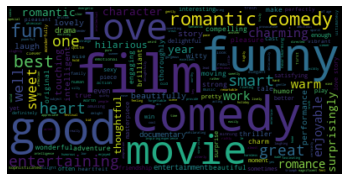

In [15]:
def plot_wordcloud_top_n(df,number_of_reviews,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_reviews,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(text_data,500,'0 Positive Sentiment Score','clean_lemmatized','positive-wordcloud')


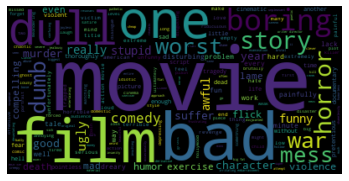

In [16]:
plot_wordcloud_top_n(text_data,500,'0 Negative Sentiment Score','clean_lemmatized','negative-wordcloud')


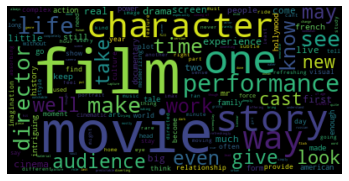

In [17]:
plot_wordcloud_top_n(text_data,500,'0 Neutral Sentiment Score','clean_lemmatized','neutral-wordcloud')


Done! This is an extremely useful skill in natural language processing and powers a lot of recommendation engines you'll come across in real life.